In [155]:
require(readr)
require(dplyr)
require(ggplot2)
require(RColorBrewer)
require(showtext)
showtext_auto()

In [157]:
data = read_csv("../../data/ontology/eval_onto_concate.csv")


-- Column specification ----------------------------------------------------------------------------------------------------------
cols(
  attribute = col_character(),
  candidate = col_character(),
  polarity = col_double(),
  relatedness = col_double()
)




In [164]:
png("h:/eval_onto.png", 800,4800,res=150)
tab = xtabs(relatedness~candidate+attribute, 
      data %>% group_by(candidate, attribute) %>% 
      summarise(relatedness=floor(mean(relatedness)), .groups="drop"))
# hc = hclust(dist(tab))
# tab = tab[rev(hc$order), ]
tab = tab[order(apply(tab, 1, sum)), ]
col_size = apply(tab, 2, function(x){sum(x!=0)})
col_size_mat = t(apply(tab, 1, function(x){x[x!=0] = col_size[which(x!=0)]; x}))
row_order = order(apply(col_size_mat, 1, sum))
tab = tab[, order(-apply(tab, 2, function(x){length(which(x!=0))}))]
tab = tab[row_order, ]
# tab = tab[order(apply(tab, 1, function(x){min(which(x==0))})),]
# tab[tab==0] = 3
ggplot(as.data.frame(tab), aes(x=attribute, y=candidate, fill=Freq)) + 
    geom_tile() +
    scale_fill_gradientn(colors=brewer.pal(8, 'Reds')) + 
    scale_x_discrete(position="top")+
    labs(x="", y="")+
    theme(text=element_text(size=20), 
          legend.position="none",
          axis.text.x=element_text(angle=90, hjust=0))
dev.off()

png 
  2

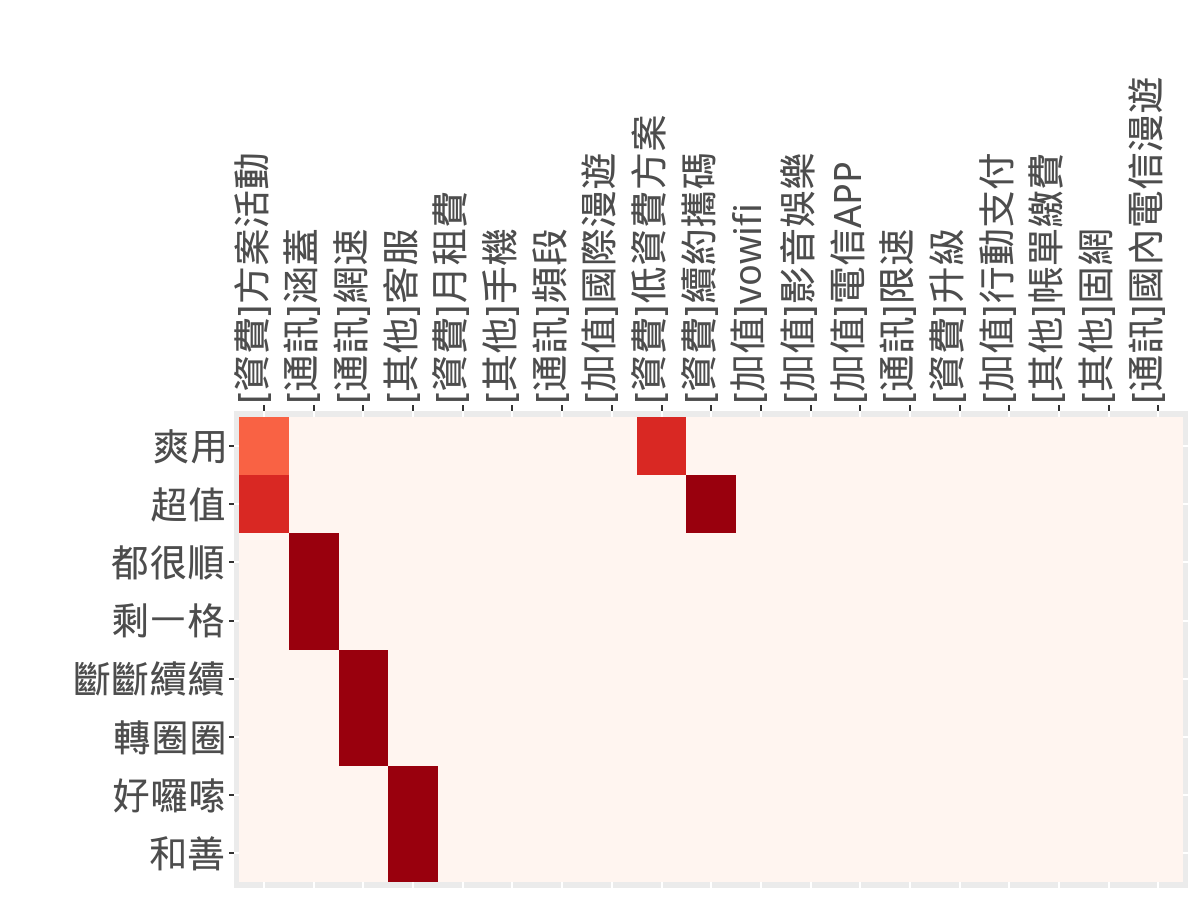

In [162]:
# png("h:/eval_onto_1.png", 800,800,res=150)
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res=150)
tgt_idx = which(rownames(tab) %in% c("超值", "剩一格", "轉圈圈", "和善"))
tgt_idx = sapply(tgt_idx, function(x){seq(x, x-1)})
tab2 = tab[tgt_idx, ]
# tab = tab[order(apply(tab, 1, function(x){min(which(x==0))})),]
# tab[tab==0] = 3
ggplot(as.data.frame(tab2), aes(x=attribute, y=candidate, fill=Freq)) + 
    geom_tile() +
    scale_fill_gradientn(colors=brewer.pal(8, 'Reds')) + 
    scale_x_discrete(position="top")+
    labs(x="", y="")+
    theme(text=element_text(size=36), 
          legend.position="none",
          axis.text.x=element_text(angle=90, hjust=0))
# dev.off()

In [161]:
c(nrow(tab), ncol(tab))

[1] 231  19